In [1]:
!pip install preprocess-kgptalkie
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=bebdfe117e6692423a2dddb4aa62b64e697a13f011b6e2d9b7c1a94f96989ccd
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [2]:
# Required libraries
import pandas as pd
import preprocess_kgptalkie as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])
df

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...


In [14]:
# Selecting needed columns and renaming
df = df[[2, 3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']

# Displaying the first few rows
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


<Axes: ylabel='count'>

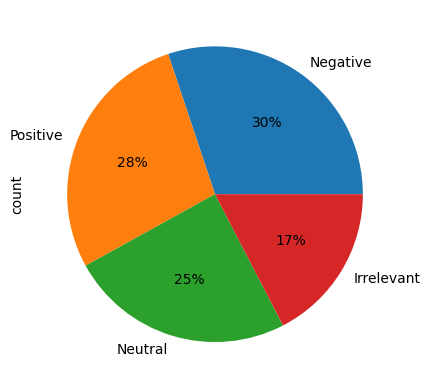

In [17]:
# Data Visualization
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')


In [19]:
# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
print(stopwords)

{'being', "why's", 'here', 'both', "when's", 'yourself', 'while', 'however', "shouldn't", "couldn't", 'his', 'own', 'each', 'not', "didn't", "aren't", 'too', 'their', 'few', 'myself', 'who', 'have', "you've", "they'd", 'did', "they're", "won't", 'below', "there's", 'yours', "you'd", 'http', 'get', 'was', 'above', 'are', 'our', 'should', 'yourselves', "you're", "haven't", "what's", 'himself', 'all', 'hence', "shan't", "doesn't", 'when', 'then', 'these', "who's", "we're", "i'm", 'for', "can't", 'there', 'why', 'some', "where's", 'again', "don't", 'at', "he'd", 'my', 'through', 'does', 'ever', 'other', 'also', "he'll", 'what', 'which', 'by', "she'll", 'about', 'having', 'herself', 'since', "we'd", "i'd", "i'll", "hadn't", 'most', 'out', 'no', 'ourselves', 'or', 'until', 'up', "here's", 'do', 'ought', 'whom', 'hers', 'because', 'we', "he's", 'more', "how's", 'as', 'had', "isn't", 'it', 'else', 'nor', 'me', 'her', 'cannot', 'shall', 'otherwise', 'he', "wasn't", 'therefore', 'is', 'further',

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Balancing the dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['text']], df['sentiment'])

# Verifying the new class distribution after resampling
print(y_resampled.value_counts())

In [27]:
# Data Cleaning: lowercase, remove urls, html, punctuations, retweets
df['text'] = df['text'].fillna('')
df['text'] = df['text'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))


In [22]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)


In [32]:
# Text Vectorization and Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure NLTK stopwords are downloaded
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# Define the pipeline for RandomForestClassifier
clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))
])

# Train the model
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [30]:
# Make predictions and evaluate the model
predictions = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.4f}')

Accuracy: 0.9023


In [29]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform the data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [33]:
# Initialize classifiers
models = {
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [34]:
# Store results
results = {}

In [35]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    # Store results
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }

Model: Naive Bayes
Accuracy: 0.7066
              precision    recall  f1-score   support

  Irrelevant       0.96      0.37      0.53      2567
    Negative       0.62      0.92      0.74      4571
     Neutral       0.87      0.57      0.68      3790
    Positive       0.69      0.81      0.74      4209

    accuracy                           0.71     15137
   macro avg       0.78      0.67      0.68     15137
weighted avg       0.76      0.71      0.69     15137



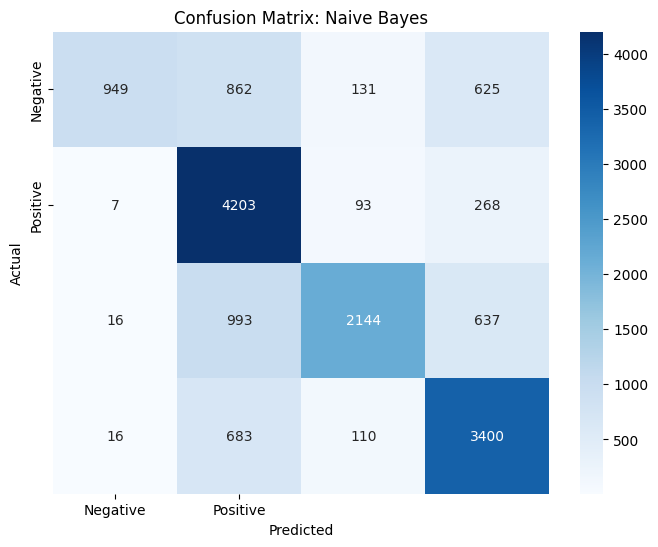

Model: Decision Tree
Accuracy: 0.7515
              precision    recall  f1-score   support

  Irrelevant       0.72      0.67      0.69      2567
    Negative       0.78      0.78      0.78      4571
     Neutral       0.71      0.75      0.73      3790
    Positive       0.77      0.77      0.77      4209

    accuracy                           0.75     15137
   macro avg       0.75      0.74      0.74     15137
weighted avg       0.75      0.75      0.75     15137



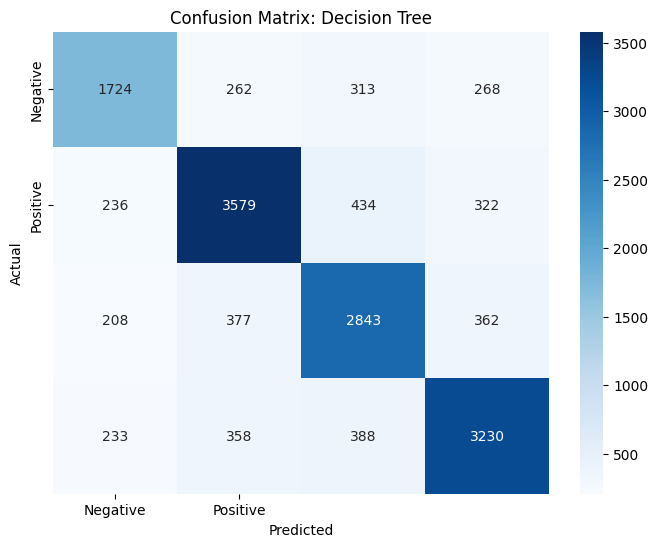

Model: SVM
Accuracy: 0.8216
              precision    recall  f1-score   support

  Irrelevant       0.84      0.75      0.79      2567
    Negative       0.83      0.87      0.85      4571
     Neutral       0.80      0.80      0.80      3790
    Positive       0.82      0.84      0.83      4209

    accuracy                           0.82     15137
   macro avg       0.82      0.81      0.82     15137
weighted avg       0.82      0.82      0.82     15137



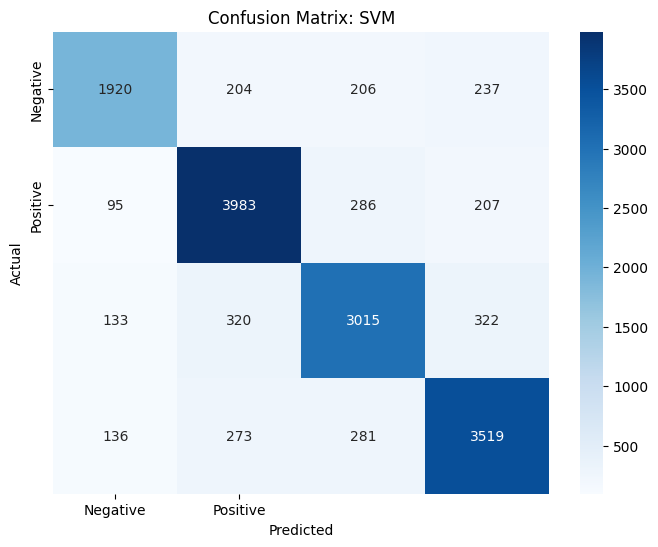

Model: Random Forest
Accuracy: 0.9050
              precision    recall  f1-score   support

  Irrelevant       0.98      0.83      0.90      2567
    Negative       0.91      0.93      0.92      4571
     Neutral       0.87      0.91      0.89      3790
    Positive       0.90      0.92      0.91      4209

    accuracy                           0.91     15137
   macro avg       0.91      0.90      0.90     15137
weighted avg       0.91      0.91      0.90     15137



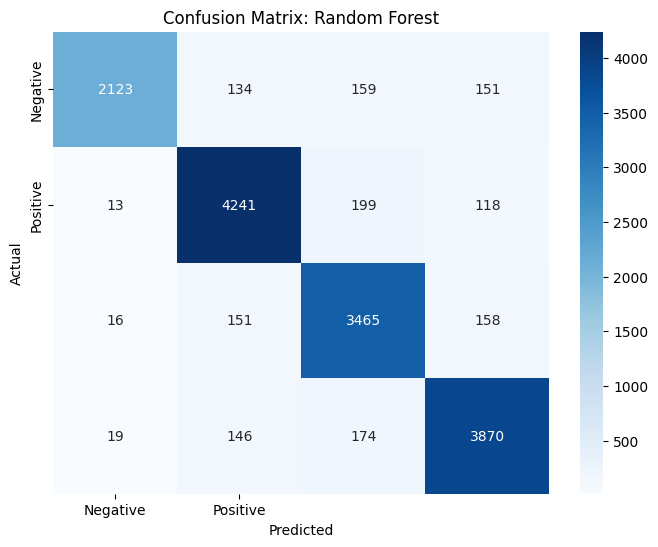

In [36]:
# Display results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(result['classification_report'])

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])

# Select needed columns and naming these columns
df = df[[2, 3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']

# Data Cleaning: lowercase, remove urls, html, punctuations, retweets
df['text'] = df['text'].fillna('')
df['text'] = df['text'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform the data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize classifiers
models = {
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    # Store results
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }

# Display results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(result['classification_report'])

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/text_preprocess.py:92: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text()
